# Preditor de Espécies da Flor Íris

<img src="images/iris_dataset_banner.png" width="100%">

## Visão geral e objetivos

Iris é um género de plantas com flor, muito apreciado pelas suas diversas espécies, que ostentam flores de cores muito vivas. São, vulgarmente, designadas como lírios, embora tal termo se aplique com mais propriedade a outro tipo de flor. É uma flor muito frequente em jardins. O conjunto de dados da flor Iris é um conjunto de dados multivariados introduzido pelo estatístico e biólogo britânico Ronald Fisher em seu artigo de 1936 que quantifica a variação morfológica das flores da íris de três espécies relacionadas. O conjunto de dados, disponível no [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Iris?spm=a2c4e.11153940.blogcont603256.5.333b1d6f05ZggC), consiste em 150 amostras de cada uma das três espécies de Iris ( Iris setosa, Iris virginica e Iris versicolor ). Quatro variáveis foram medidas em cada amostra: o comprimento e a largura das sépalas e pétalas, em centímetros (Fonte: Wikipedia: [Conjunto de dados flor Iris](https://pt.wikipedia.org/wiki/Conjunto_de_dados_flor_Iris)). Considerando este conjunto de dados, deseja-se construir uma aplicação web que auxilie botânicos e floriculturistas a classificar de forma mais precisa é mais rápida uma Iris data as medidas da sépala é da pétala.

# Passo 1. Configuração do projeto

In [16]:
# standard library packages
import joblib
import os
import urllib

# third-party library packages
import matplotlib
import matplotlib.pyplot as plt
import numpy  as np
import pandas as pd

from sklearn.neighbors import KNeighborsClassifier


print('Matplotlib version : {}'.format(matplotlib.__version__))
print('Numpy version      : {}'.format(np.__version__))
print('Pandas version     : {}'.format(pd.__version__))

IRIS_ROOT = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/'
IRIS_URL  = IRIS_ROOT + 'iris.data'

DATA_PATH = os.path.join('..', 'data', 'raw')
DATA_FILE = 'iris.csv'
IRIS_DATA = DATA_PATH + '/' + DATA_FILE

DEPLOY_PATH = os.path.join('..', 'app', 'model')
DEPLOY_FILE = 'finalized_model.sav'

print('Configuração completa')

Matplotlib version : 3.2.2
Numpy version      : 1.18.5
Pandas version     : 1.0.5
Configuração completa


# Passo 2. Carga dos dados

In [17]:
def download_iris_data(data_url=IRIS_URL, data_path=DATA_PATH, data_file=DATA_FILE):
    os.makedirs(data_path, exist_ok=True)
    local_path = os.path.join(data_path, data_file)
    urllib.request.urlretrieve(data_url, local_path)

def load_iris_data(data_path=DATA_PATH, data_file=DATA_FILE):
    csv_path = os.path.join(DATA_PATH, data_file)
    return pd.read_csv(csv_path, header=None, names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class'])

In [18]:
if not os.path.exists(IRIS_DATA):
    download_iris_data(IRIS_URL, IRIS_DATA)

In [19]:
iris_data = load_iris_data(DATA_PATH, DATA_FILE)

# Passo 3. Análise Exploratória de Dados

## Descrição do dataset Iris

In [20]:
iris_data.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [21]:
print('Iris dataset has {} rows and {} columns'.format(iris_data.shape[0], iris_data.shape[1]))

Iris dataset has 150 rows and 5 columns


In [22]:
iris_data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Correlação e distribuição dos dados

In [23]:
X = iris_data[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y = iris_data['class']

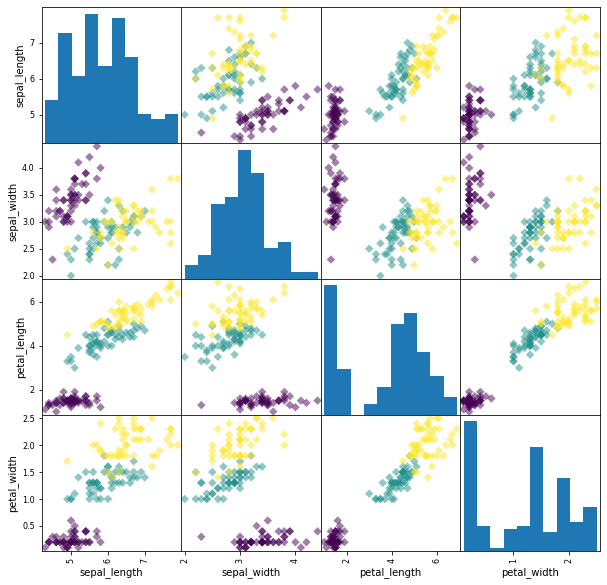

In [24]:
colors = y.astype('category').cat.codes
_ = pd.plotting.scatter_matrix(X, c=colors, figsize=[10, 10], marker='D')

# Passo 4. Treinamento do modelo

In [25]:
model = KNeighborsClassifier(n_neighbors=6)
model.fit(X, y)

KNeighborsClassifier(n_neighbors=6)

# Passo 5. Teste do modelo

In [26]:
X_test = [[5.6, 2.8, 3.9, 1.1], 
          [5.7, 2.6, 3.8, 1.3], 
          [4.7, 3.2, 1.3, 0.2]]
predictings = model.predict(X_test)
print('Predicao: {}'.format(predictings))

Predicao: ['Iris-versicolor' 'Iris-versicolor' 'Iris-setosa']


# Passo 6. Implantação do modelo

In [27]:
filename = os.path.join(DEPLOY_PATH, DEPLOY_FILE)
joblib.dump(model, filename)

['..\\app\\model\\finalized_model.sav']